<span STYLE="font-size:150%"> 
    Make calibration curve from standard samples
</span>

Docker image: gnasello/datascience-env:2023-03-30 \
Latest update: 31 March 2023

# Load libraries

In [33]:
library(ggplot2)
library(latex2exp)
library(ggpubr)
library(yaml)
library(readxl)

Clone the [r_utils library](https://github.com/gabnasello/r_utils.git) from GitHub in the same folder of this script. 

You can simply running the following command in a new terminal (open it from JupyterLab):

`git clone https://github.com/gabnasello/r_utils.git`

How to Reuse Functions That You Create In Scripts, [tutorial](https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-data/source-function-in-R/)

In [34]:
source("r_utils/ggplot_utils.R")

# Reading data

In [35]:
filename <- "data/2023-03-28_GN011.xlsx"

In [36]:
df <- read_excel(filename)

# Import Excel Data into R Dataframe
df <- data.frame(df)
head(df)

,Well.ID,Name,Well,Conc.Dil,X275480,Count,Mean,Std.Dev,CV....
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,BLK,NA,H1,NA,4249,3,3395,777,22.888000000000002
2,NA,NA,H2,NA,3208,NA,NA,NA,NA
3,NA,NA,H3,NA,2729,NA,NA,NA,NA
4,SPL1,NA,A1,NA,10349,1,10349,?????,?????
5,SPL2,NA,A2,NA,22987,1,22987,?????,?????
6,SPL3,NA,A3,NA,9415,1,9415,?????,?????


Remove df rows where the `Well.ID` columns is `NA`

In [37]:
df <- df[complete.cases(df$Well.ID),]
head(df)

,Well.ID,Name,Well,Conc.Dil,X275480,Count,Mean,Std.Dev,CV....
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,BLK,NA,H1,NA,4249,3,3395,777,22.888000000000002
4,SPL1,NA,A1,NA,10349,1,10349,?????,?????
5,SPL2,NA,A2,NA,22987,1,22987,?????,?????
6,SPL3,NA,A3,NA,9415,1,9415,?????,?????
7,SPL4,NA,A4,NA,8467,1,8467,?????,?????
8,SPL5,NA,A5,NA,13380,1,13380,?????,?????


# Select standard samples

In [38]:
prefix <- 'STD'

In [39]:
condition <- startsWith(df$Well.ID, prefix)

df_std <- df[condition,]
df_std

,Well.ID,Name,Well,Conc.Dil,X275480,Count,Mean,Std.Dev,CV....
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
64,STD1,NA,G1,50.00000,81314,1,81314,?????,?????
65,STD2,NA,G2,25.00000,49438,1,49438,?????,?????
66,STD3,NA,G3,12.50000,34360,1,34360,?????,?????
67,STD4,NA,G4,6.25000,24774,1,24774,?????,?????
68,STD5,NA,G5,3.12500,17540,1,17540,?????,?????
69,STD6,NA,G6,1.56250,13064,1,13064,?????,?????
70,STD7,NA,G7,0.78125,6907,1,6907,?????,?????
71,STD8,NA,G8,0.39063,6371,1,6371,?????,?????
72,STD9,NA,G9,0.00000,2910,1,2910,?????,?????


# Subtract blank from `Mean` values

In [40]:
df_std$Mean_blnk <- df_std$Mean - df_std[df_std$Conc.Dil == 0, 'Mean']
df_std

,Well.ID,Name,Well,Conc.Dil,X275480,Count,Mean,Std.Dev,CV....,Mean_blnk
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,STD1,NA,G1,50.00000,81314,1,81314,?????,?????,78404
65,STD2,NA,G2,25.00000,49438,1,49438,?????,?????,46528
66,STD3,NA,G3,12.50000,34360,1,34360,?????,?????,31450
67,STD4,NA,G4,6.25000,24774,1,24774,?????,?????,21864
68,STD5,NA,G5,3.12500,17540,1,17540,?????,?????,14630
69,STD6,NA,G6,1.56250,13064,1,13064,?????,?????,10154
70,STD7,NA,G7,0.78125,6907,1,6907,?????,?????,3997
71,STD8,NA,G8,0.39063,6371,1,6371,?????,?????,3461
72,STD9,NA,G9,0.00000,2910,1,2910,?????,?????,0


Subtract blank from `Mean` values of the entire dataset

In [41]:
df$Mean_blnk <- df$Mean - df_std[df_std$Conc.Dil == 0, 'Mean']
head(df)

,Well.ID,Name,Well,Conc.Dil,X275480,Count,Mean,Std.Dev,CV....,Mean_blnk
,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,BLK,NA,H1,NA,4249,3,3395,777,22.888000000000002,485
4,SPL1,NA,A1,NA,10349,1,10349,?????,?????,7439
5,SPL2,NA,A2,NA,22987,1,22987,?????,?????,20077
6,SPL3,NA,A3,NA,9415,1,9415,?????,?????,6505
7,SPL4,NA,A4,NA,8467,1,8467,?????,?????,5557
8,SPL5,NA,A5,NA,13380,1,13380,?????,?????,10470


Overwrite initial dataset after subtracting the blank value

In [42]:
new_filename <- paste(tools::file_path_sans_ext(filename), '.csv', sep='')
new_filename

[1] "data/2023-03-28_GN011.csv"

In [43]:
write.csv(df, new_filename, row.names=FALSE)

# Plot calibration data

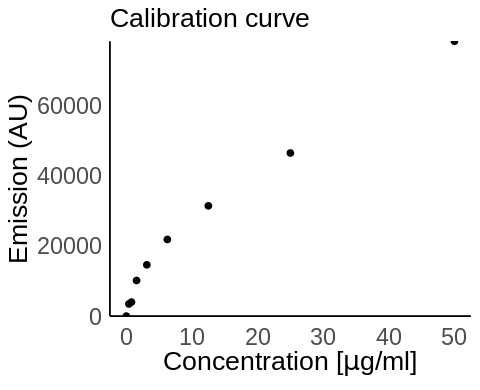

In [44]:
p <- ggplot(df_std, aes(x=Conc.Dil, y=Mean_blnk)) + geom_point(size=1.5)

img <- ggplotMinAethetics(p, width=4, height=3.25,
                          title='Calibration curve',
                          xlabel=TeX('Concentration [$\\mu$g/ml]'), 
                          ylabel='Emission (AU)', 
                          scale_color='npg')
img

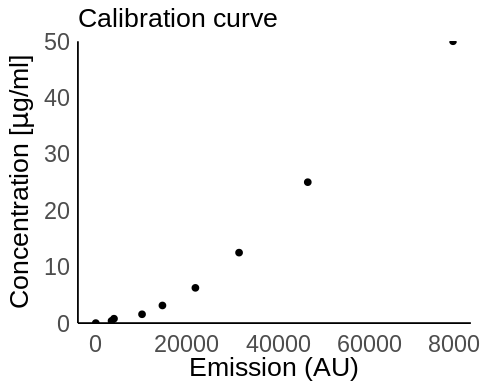

In [45]:
p <- ggplot(df_std, aes(x=Mean_blnk, y=Conc.Dil)) + geom_point(size=1.5)

img <- ggplotMinAethetics(p, width=4, height=3.25,
                          title='Calibration curve',
                          ylabel=TeX('Concentration [$\\mu$g/ml]'), 
                          xlabel='Emission (AU)', 
                          scale_color='npg')
img

# Linear regression

Set the **intercept** of the linear model to **zero**

In [46]:
# Build the linear model
model  <- lm(Conc.Dil ~ Mean_blnk + 0, data = df_std)
summary(model)


Call:
lm(formula = Conc.Dil ~ Mean_blnk + 0, data = df_std)

Residuals:
   Min     1Q Median     3Q    Max 
-6.015 -5.082 -1.551 -1.100  6.019 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
Mean_blnk 5.609e-04  4.268e-05   13.14 1.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.294 on 8 degrees of freedom
Multiple R-squared:  0.9557,	Adjusted R-squared:  0.9502 
F-statistic: 172.8 on 1 and 8 DF,  p-value: 1.068e-06


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


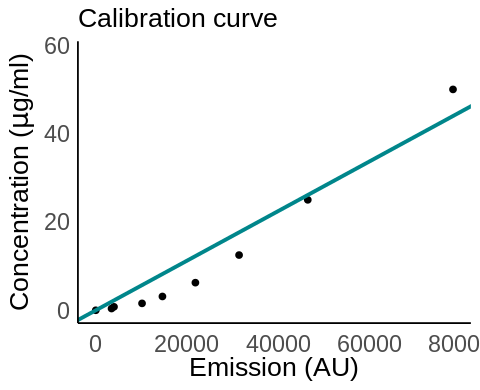

In [47]:
p <- ggplot(df_std, aes(x=Mean_blnk, y=Conc.Dil)) + geom_point(size=1.5) + 
     geom_abline(slope = coef(model)[["Mean_blnk"]], 
                 intercept = 0, color='turquoise4', linewidth=1.1)

img <- ggplotMinAethetics(p, width=4, height=3.25,
                          title='Calibration curve',
                          ylabel=TeX('Concentration ($\\mu$g/ml)'), 
                          xlabel='Emission (AU)', 
                          scale_color='npg') +
       ylim(0, 58)
img

# Save model

In [48]:
saveRDS(model, "calibration.rds")